__For testing calibration issues. performed after test2__

# pH Calibration Factors
Includes:

- pH calibration factors for the pH probe
- pH calculation formulas, including temperature compensation
- pH probe calibration procedures
- brief description of the calibration procedures
- a formula to compute the calibration slope and intercept values using basic Python, with a function to verify pH calculations (to have a second verification of the C++ code)

## pH Slope, Intercept, and Approximation Calculation

$$ \begin{align}
slope &= \frac{\frac{(7.0 - 4.01)}{(neutralVoltage - acidVoltage)} + \frac{(7 - 10.0)}{(neutralVoltage - baseVoltage)}}{2} \\
intercept &= 7.0 - slope * (neutralVoltage) \\
compensatedSlope &= slope * \frac{(temperature + 273.15)}{(25.0 + 273.15)} \\
pHValue &= compensatedSlope * voltage + intercept
\end{align} $$

Where:

- slope = initial pH slope calculated using known pH values and the respective voltages as measured by the pH sensor,
- interceptPH = the intercept calculated using the neutral voltage as a reference point
- compensatedSlope = the slope adjusted for temperature variations
- pHValue = the calculated pH value





### Calibration Procedure

[1] Prepare pH probe by rinsing with De-Ionized or Battery Water, minimum (3) rinses, preferably (7).

[2] Calibrate pH probe using pH 4.0 or 4.01 buffer solution, minimum (2) times, using the calibration code.
- Note: This probe has a screw-on cap. I filled the cap, affixed it to the probe threads, and proceeded to measure.

[3] The calibration buffer will fill, wait until the 50 measurement threshold is reached, then use that value.

[4] Repeat [step 1] to cleanse the pH probe.

[5] Repeat [step 3] with pH 7.0 buffer solution, minimum (2) times.

[6] Repeat [step 1] to cleanse the pH probe.

[7] Repeat [step 3] with pH 10.0 buffer solution, minimum (2) times.

[8] Repeat [step 1] to cleanse the pH probe.

[9] Write the values into the code, assigning them to appropriate variables. Be sure to use the unmodified voltage registering on pin A0.

---

**Function to save plots as files**

In [1]:
from pathlib import Path
import emoji

IMAGES_PATH = Path() / "images" / "results_and_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

print(emoji.emojize(":check_mark_button:"))

✅


# pH Calibration Testing

- Calibrate with each solution, 1 at a time.
- Separate measuring time by 10 minutes, and perform 5 tests.
    - This is to determine if the probe is inconsistent betwen power cycles.
    - Plot the points using a scatterplot.
    - We will take the average of the voltage for the final final.
- Once separate measurements are completed, use new calibration solution and measure for one hour.
- This is to determine if the probe is consistent over time.
- Calibration liquids are at room temperature - any temperatures indicated here are room temp only (ambient). Liquid temperatures are between 22 ºC - 25 ºC, and are placed in a calibration probe cap when measured. The cap is threaded onto the probe, and the electrode is submerged. 


Remember: Because we are using a 10kOhm Resistor, the voltage values are read at half of what they actually are. The calibration script takes 50 measurements, then calculates the median.

We will record the 5 values below in a markdown cell (as well as save the serial logs for each measurement to the folder). The one hour sample will be saved to a serial port log file, and attached to this folder.

Additional Notes:

- The acid calibration solution was not dated.
- The basic solution was dated opened on October 2024.
- Voltage measurement increased by 16.5 mV partway through the test.

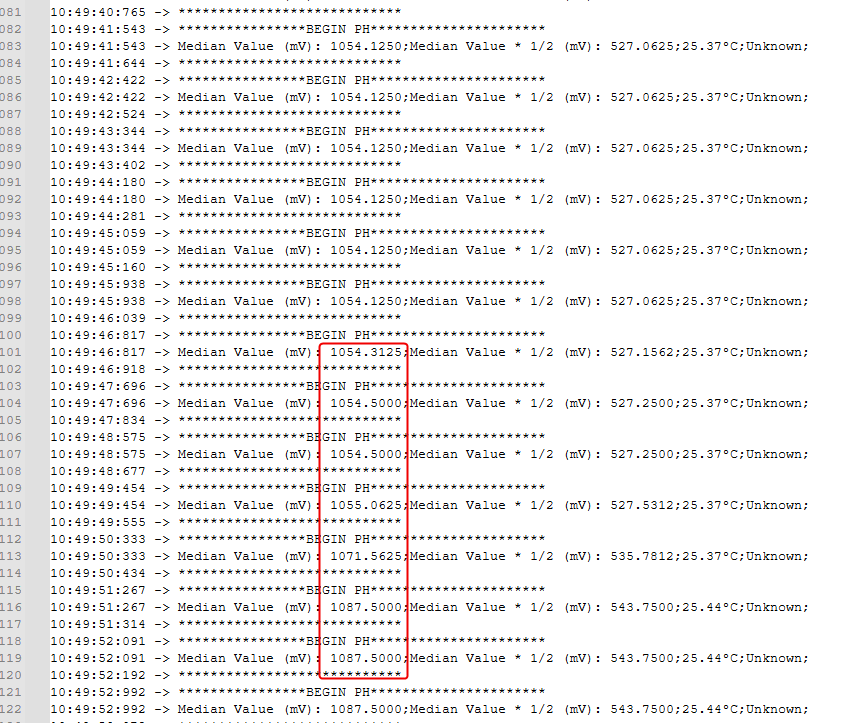


## 📋 Recorded Values

---

### 🧪 Acid Results

- After 3 measures, I replaced approximately **40–50%** of the calibration solution.

| Time  | Date      | Median (mV) | Median × ½ (mV) | Note    |
|-------|-----------|-------------|------------------|---------|
| 11:23 | 16.04.25  | 2059.5000   | 1029.7500        | Acidic  |
| 11:34 | 16.04.25  | 2062.8750   | 1031.4375        | Acidic  |
| 11:45 | 16.04.25  | 2064.7500   | 1032.3750        | Acidic  |
| 11:57 | 16.04.25  | 2062.5000   | 1031.2500        | Acidic  |
| 12:07 | 16.04.25  | 2063.2500   | 1031.6250        | Acidic  |

**_Recorded Acid Voltage from Test 1 Calibration:_** 2041.88  
**_Recorded Acid Voltage from Test 2 Calibration:_** 2086.00  
**_Recorded Acid Voltage from Calibration 3:_** **2062.575** ⬅️ *Mean of the 5 measurements*

---

### 🧪 Base Results

- After 1st measure: Rinsed the probe 3× in basic solution, replaced ~40–50% of calibration solution.  
- After 4th measure: Rinsed again 3× in basic solution, replaced ~40–50% of solution.

| Time  | Date      | Median (mV) | Median × ½ (mV) | Note     |
|-------|-----------|-------------|------------------|----------|
| 09:20 | 17.04.25  | 1105.5000   | 552.7500         | Unknown  |
| 09:33 | 17.04.25  | 1054.1250   | 527.0625         | Unknown  |
| 09:44 | 17.04.25  | 1053.5625   | 526.7812         | Unknown  |
| 10:07 | 17.04.25  | 1053.7500   | 526.8750         | Unknown  |
| 10:19 | 17.04.25  | 1053.7500   | 526.8750         | Unknown  |
| 10:30 | 17.04.25  | 1054.1250   | 527.0625         | Unknown  |

**_Recorded Base Voltage from Test 1 Calibration:_** 1104.00  
**_Recorded Base Voltage from Test 2 Calibration:_** 1123.50  
**_Recorded Base Voltage from Calibration 3:_** **1062.46875** ⬅️ *Mean of the 6 measurements*

---

### 🧪 Neutral Results

- After 3 measures, I replaced approximately **40–50%** of the calibration solution.

| Time  | Date      | Median (mV) | Median × ½ (mV) | Temp (°C) | Note     |
|-------|-----------|-------------|------------------|-----------|----------|
| 12:02 | 17.04.25  | 1535.2500   | 767.6250         | 24.19     | Neutral  |
| 12:13 | 17.04.25  | 1536.3750   | 768.1875         | 23.81     | Neutral  |
| 12:24 | 17.04.25  | 1537.1250   | 768.5625         | 23.69     | Neutral  |
| 12:37 | 17.04.25  | 1537.5000   | 768.7500         | 23.62     | Neutral  |
| 12:52 | 17.04.25  | 1536.3750   | 768.1875         | 23.81     | Neutral  |

**_Recorded Base Voltage from Test 1 Calibration:_** 1568.24  
**_Recorded Base Voltage from Test 2 Calibration:_** 1577.82  
**_Recorded Base Voltage from Calibration 3:_** **1536.525** ⬅️ *Mean of the 5 measurements*

---



<Figure size 640x480 with 0 Axes>

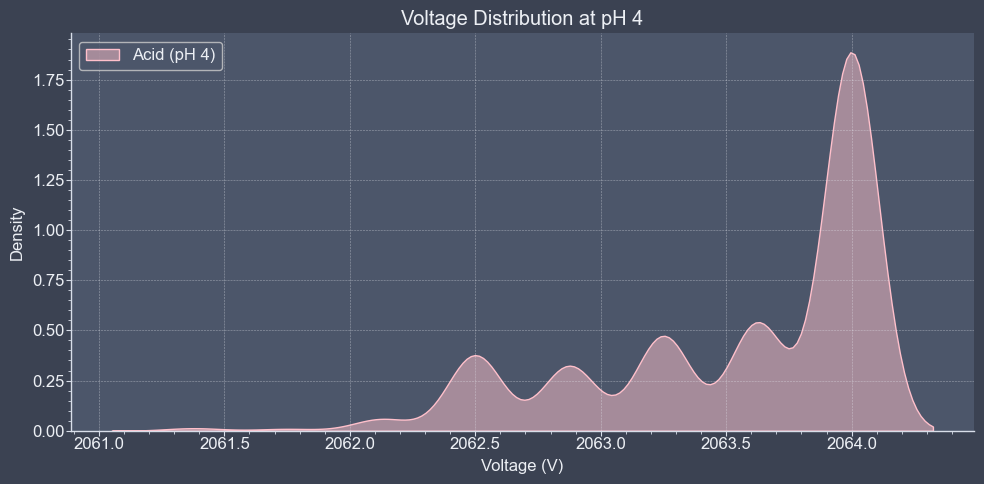

In [18]:
# Acid Test Scatterplot - 1-Hour measurement
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("acid/1-hour-test/cleaned for numpy/COM4_2025_04_16.12.17.51.713.csv", sep=';')
acid_cal = df['Median'].to_numpy()

# Plot the calibration points

from aquarel import load_theme
theme = load_theme("arctic_dark")
theme.apply()

# Set the figure size
plt.figure(figsize=(10, 5))
sns.kdeplot(acid_cal, label="Acid (pH 4)", color="pink", fill=True, alpha=0.5)

plt.xlabel("Voltage (V)")

# Title
plt.title("Voltage Distribution at pH 4")


# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_calibration_curve_against_field_measurements", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()

<Figure size 640x480 with 0 Axes>

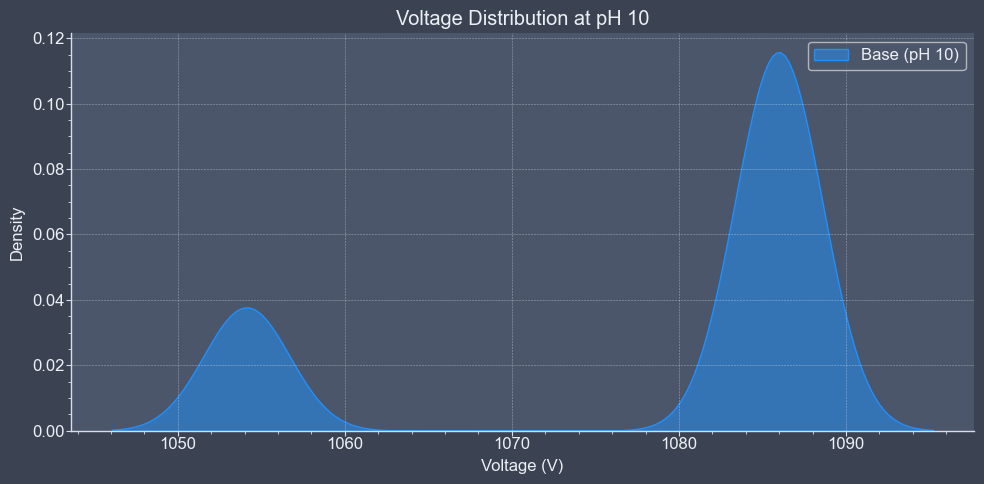

In [16]:
df = pd.read_csv("base/1-hour-test/cleaned for numpy/COM4_2025_04_17.10.34.01.939.csv", sep=';')
base_cal = df['Median'].to_numpy()

# Plot the calibration points

from aquarel import load_theme
theme = load_theme("arctic_dark")
theme.apply()

# Set the figure size
plt.figure(figsize=(10, 5))

sns.kdeplot(base_cal, label="Base (pH 10)", color="dodgerblue", fill=True, alpha=0.5)

plt.xlabel("Voltage (V)")

# Title
plt.title("Voltage Distribution at pH 10")

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_calibration_curve_against_field_measurements", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()

In [ ]:
df = pd.read_csv("neutral/1-hour-test/cleaned for numpy/COM4_2025_04_17.10.34.01.939.csv", sep=';')
base_cal = df['Median'].to_numpy()

# Plot the calibration points

from aquarel import load_theme
theme = load_theme("arctic_dark")
theme.apply()

# Set the figure size
plt.figure(figsize=(10, 5))

sns.kdeplot(base_cal, label="Neutral (pH 7)", color="yellow", fill=True, alpha=0.5)

plt.xlabel("Voltage (V)")

# Title
plt.title("Voltage Distribution at pH 7")

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_calibration_curve_against_field_measurements", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()

10-minute test acid mean:  2062.575
10 minute test base mean:  1062.46875
10 minute test neutral mean:  1536.525


<Figure size 640x480 with 0 Axes>

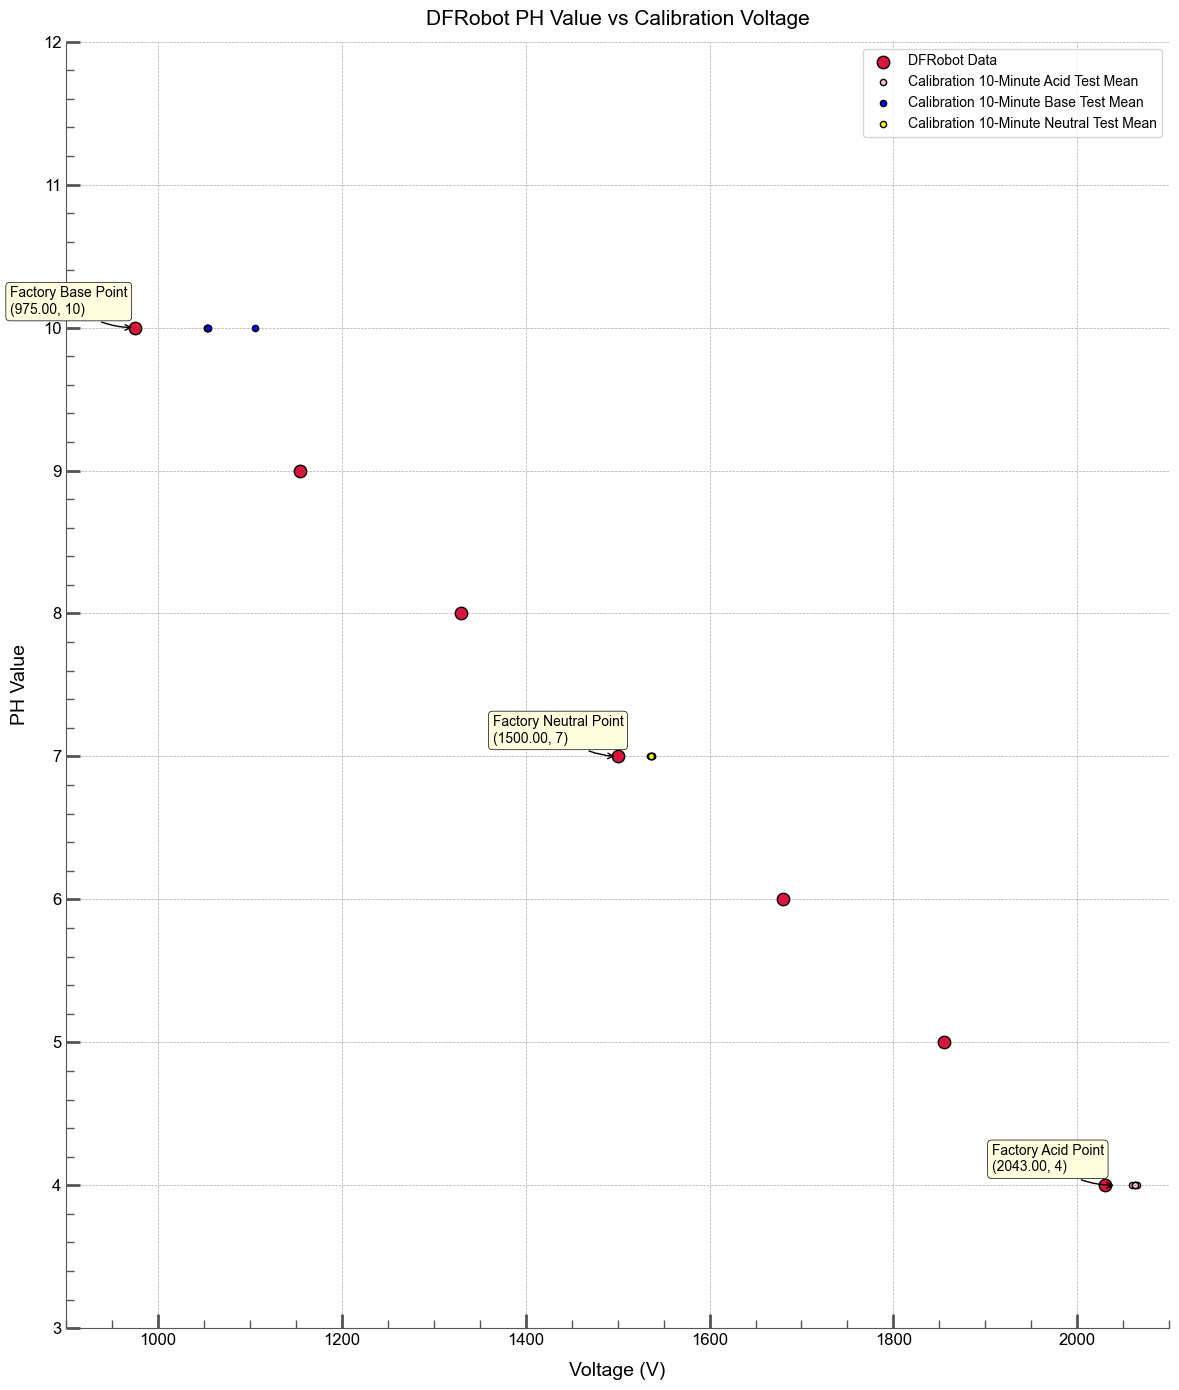

In [43]:
import numpy as np
import matplotlib.pyplot as plt

cal_acid_test = np.array([2059.5, 2062.875, 2064.75, 2062.50, 2063.2500])
cal_acid_test_mean = np.mean(cal_acid_test)
print("10-minute test acid mean: ", cal_acid_test_mean)

cal_base_test = np.array([1105.500, 1054.1250, 1053.5625, 1053.7500, 1053.7500, 1054.1250])
cal_base_test_mean = np.mean(cal_base_test)
print("10 minute test base mean: ", cal_base_test_mean)

cal_neutral_test = np.array([1535.2500, 1536.3750, 1537.1250, 1537.5000, 1536.3750])
cal_neutral_test_mean = np.mean(cal_neutral_test)
print("10 minute test neutral mean: ", cal_neutral_test_mean)

plt.figure(figsize=(12,14))

from aquarel import load_theme
theme = load_theme("scientific")
theme.apply()

DFRobot_voltages = np.array([2745, 2570, 2390, 2210, 2030, 1855, 1680, 1500, 1330, 1155, 975, 800, 620, 445, 265])
DFRobot_ph = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
DFRobot = np.stack((DFRobot_voltages, DFRobot_ph), axis=1)
#print(DFRobot)

plt.scatter(DFRobot_voltages, DFRobot_ph, color='crimson', edgecolor='black', s=80, label='DFRobot Data')
plt.scatter(cal_acid_test, np.full(len(cal_acid_test), 4), color='pink', edgecolor='black', s=20, label='Calibration 10-Minute Acid Test Mean')
plt.scatter(cal_base_test, np.full(len(cal_base_test), 10), color='blue', edgecolor='black', s=20, label='Calibration 10-Minute Base Test Mean')
plt.scatter(cal_neutral_test, np.full(len(cal_neutral_test), 7), color='yellow', edgecolor='black', s=20, label='Calibration 10-Minute Neutral Test Mean')

# Annotations
important_points = [
    (1500, 7, "Factory Neutral Point"),
    (975, 10, "Factory Base Point"),
    (2043, 4, "Factory Acid Point"),
]

for x, y, label in important_points:
    plt.annotate(
        f'{label}\n({x:.2f}, {y})',
        xy=(x, y),
        xytext=(-90, 10),  # Offset
        textcoords='offset points',
        fontsize=10,
        color='black',
        bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="black", lw=0.5),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2")
    )


plt.xlabel('Voltage (V)', fontsize=14, labelpad=10)
plt.ylabel('PH Value', fontsize=14, labelpad=10)
plt.title('DFRobot PH Value vs Calibration Voltage', fontsize=15, pad=12)

plt.xlim(900, 2100)
plt.ylim(3, 12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.legend(loc='best')
plt.show()

theme.apply_transforms()

## Begin Caculation

In [ ]:
#Define resistor offset (10k resistor between ADS1115 A0 pin and ground)
resistancemultiplier = 2

# Set voltages for pH 4.00, 7.00, and 10.01 buffers, as measured by the sensor

neutralVoltage = 788.91 * resistancemultiplier
acidVoltage = 1043.00 * resistancemultiplier
baseVoltage = 561.75 * resistancemultiplier

print("Let's confirm the values...")
print(f'Resistance multiplier: {resistancemultiplier}')
print(f'Neutral voltage: {neutralVoltage}')
print(f'Acid voltage: {acidVoltage}')
print(f'Base voltage: {baseVoltage}')

# degrees Celsius, for temperature compensation, specify the temperature at which
# the sensor is calibrated, or to calculate the pH at a different temperature
temperature = 25.0 

slope = ((7 - 4.00)/(neutralVoltage - acidVoltage)+(7-10)/(neutralVoltage - baseVoltage))/2

print(f'Slope: {slope}')

intercept_t1 = 4.00 - (slope * acidVoltage)

print(f'Theoretical Intercept using Acid Voltage (not used in prod. code): {intercept_t1}')

intercept_t2 = 10.00 - (slope * baseVoltage)

print(f'Theoretical Intercept using Base Voltage (not used in prod. code): {intercept_t2}')

intercept = 7 - (slope * neutralVoltage)

print(f'Actual Intercept using Neutral Voltage (used in prod. code): {intercept}')

compensatedslope = slope*((temperature+273.15)/(25+273.15))

print(f'Compensated slope: {compensatedslope}')

# The volts are in millivolts
def calculatepH(voltage):
    # Calculate pH value
    # Voltage must first be compensated with resistor offset
    phvalue = compensatedslope * voltage + intercept
    print("pH with voltage: ", voltage, " is: ", phvalue)
    return phvalue

Let's confirm the values...
Resistance multiplier: 2
Neutral voltage: 1577.82
Acid voltage: 2086.0
Base voltage: 1123.5
Slope: -0.006243508602849564
Theoretical Intercept using Acid Voltage (not used in prod. code): 17.03395894554419
Theoretical Intercept using Base Voltage (not used in prod. code): 17.024581915301486
Actual Intercept using Neutral Voltage (used in prod. code): 16.851132743748096
Compensated slope: -0.006243508602849564


In [28]:
calculatepH(1800)

pH with voltage:  1800  is:  5.612817258618881


5.612817258618881

[[2745    0]
 [2570    1]
 [2390    2]
 [2210    3]
 [2030    4]
 [1855    5]
 [1680    6]
 [1500    7]
 [1330    8]
 [1155    9]
 [ 975   10]
 [ 800   11]
 [ 620   12]
 [ 445   13]
 [ 265   14]]


<Figure size 640x480 with 0 Axes>

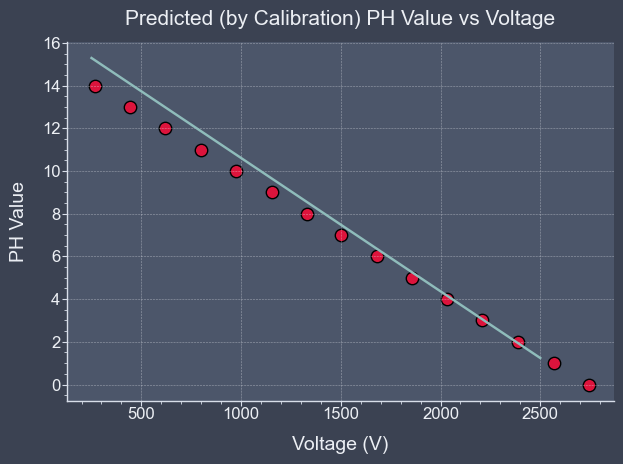

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -0.006243508602849564 * x + 16.851132743748096

plt.figure()
x = np.linspace(250, 2500, 100)
y = f(x)

from aquarel import load_theme
theme = load_theme("arctic_dark")
theme.apply()

DFRobot_voltages = np.array([2745, 2570, 2390, 2210, 2030, 1855, 1680, 1500, 1330, 1155, 975, 800, 620, 445, 265])
DFRobot_ph = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
DFRobot = np.stack((DFRobot_voltages, DFRobot_ph), axis=1)
print(DFRobot)


plt.plot(x, y)
plt.scatter(DFRobot_voltages, DFRobot_ph, color='crimson', edgecolor='black', s=80)
plt.xlabel('Voltage (V)', fontsize=14, labelpad=10)
plt.ylabel('PH Value', fontsize=14, labelpad=10)
plt.title('Predicted (by Calibration) PH Value vs Voltage', fontsize=15, pad=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

theme.apply_transforms()

(37, 11)
These metrics apply to the lab measurements:
Slope (converted to volts!):  -6.243508602849564
Intercept:  16.851132743748096
PH Coefficient of Determination R²: -0.004259337800696983
PH RMSE: 0.14193244114047926
PH Standard Deviation: 0.1416311342196819


<Figure size 640x480 with 0 Axes>

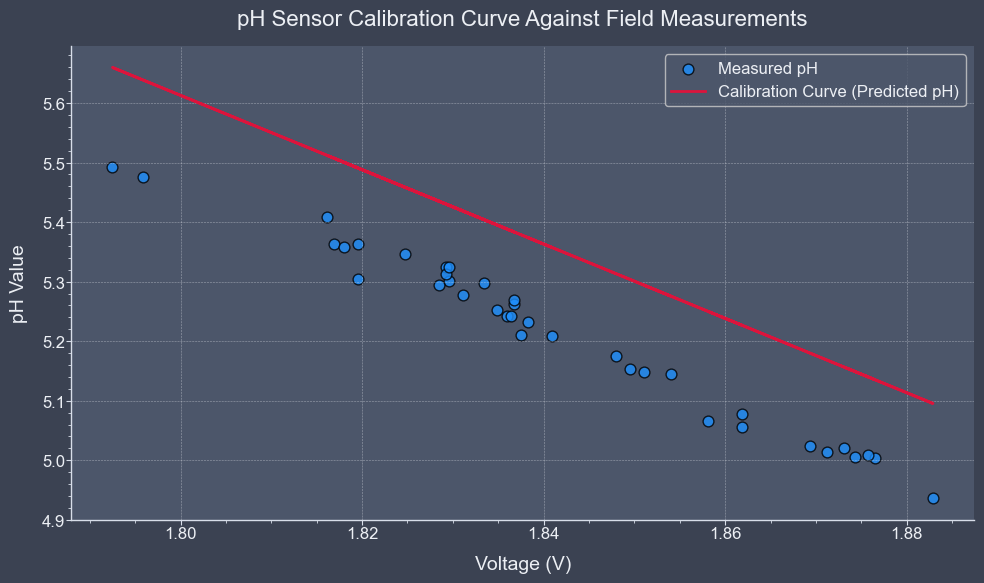

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Let's confirm the values...
# Resistance multiplier: 2
# Neutral voltage: 1577.82
# Acid voltage: 2086.0
# Base voltage: 1123.5
# Slope: -0.006243508602849564
# Intercept: 16.851132743748096
# Compensated slope: -0.006243508602849564

# Load dataset
df = pd.read_csv('data.csv', sep=';')
print(df.shape)

# Computed pH values from the sensor
y_computed = df['pH'].to_numpy()  # measured and fitted values

# Raw (unfitted), voltage multiplied values from the sensor
voltagePh = df['voltagePh'].to_numpy()  # measured and unfitted values

# Predicted pH values using the equation
y_predicted = -6.243508602849564 * voltagePh + 16.851132743748096

# Print Slope and Intercept
print("These metrics apply to the lab measurements:")
print("Slope (converted to volts!): ", -6.243508602849564)
print("Intercept: ", 16.851132743748096)

# Compute mean of actual values
y_mean = np.mean(y_computed)

# Compute R^2
ss_total = np.sum((y_computed - y_mean) ** 2)
ss_residual = np.sum((y_computed - y_predicted) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Compute RMSE
mse = ((y_computed - y_predicted) ** 2).mean()
rmse = np.sqrt(mse)

print("PH Coefficient of Determination R²:", r_squared)
print("PH RMSE:", rmse)
print("PH Standard Deviation:", np.std(y_computed))

# Plot the calibration curve

from aquarel import load_theme
theme = load_theme("arctic_dark")
theme.apply()

# Set the figure size
plt.figure(figsize=(10, 6))

# Actual data points
plt.scatter(voltagePh, y_computed, 
            label='Measured pH', 
            color='dodgerblue', 
            edgecolor='black', 
            s=60, 
            alpha=0.8)

# Prediction line
plt.plot(voltagePh, y_predicted, 
         color='crimson', 
         label='Calibration Curve (Predicted pH)', 
         linewidth=2)

# Axis labels
plt.xlabel('Voltage (V)', fontsize=14, labelpad=10)
plt.ylabel('pH Value', fontsize=14, labelpad=10)

# Title
plt.title('pH Sensor Calibration Curve Against Field Measurements', fontsize=16, pad=15)

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend(fontsize=12, loc='best', frameon=True)

# Optional: tighter layout
plt.tight_layout()

# Save the figure
save_fig("pH_sensor_calibration_curve_against_field_measurements", tight_layout=True, fig_extension="png", resolution=300)

# Show the plot
plt.show()

theme.apply_transforms()



Coefficients:  -6.278439039168245
Intercept:  16.772229250074705
These metrics apply to the test set:
Mean absolute error:  0.01827453255644962
Mean squared error:  0.0004954038242016673
Root mean squared error:  0.022257668885165564
Coefficient of determination R²:  0.9509977459298194


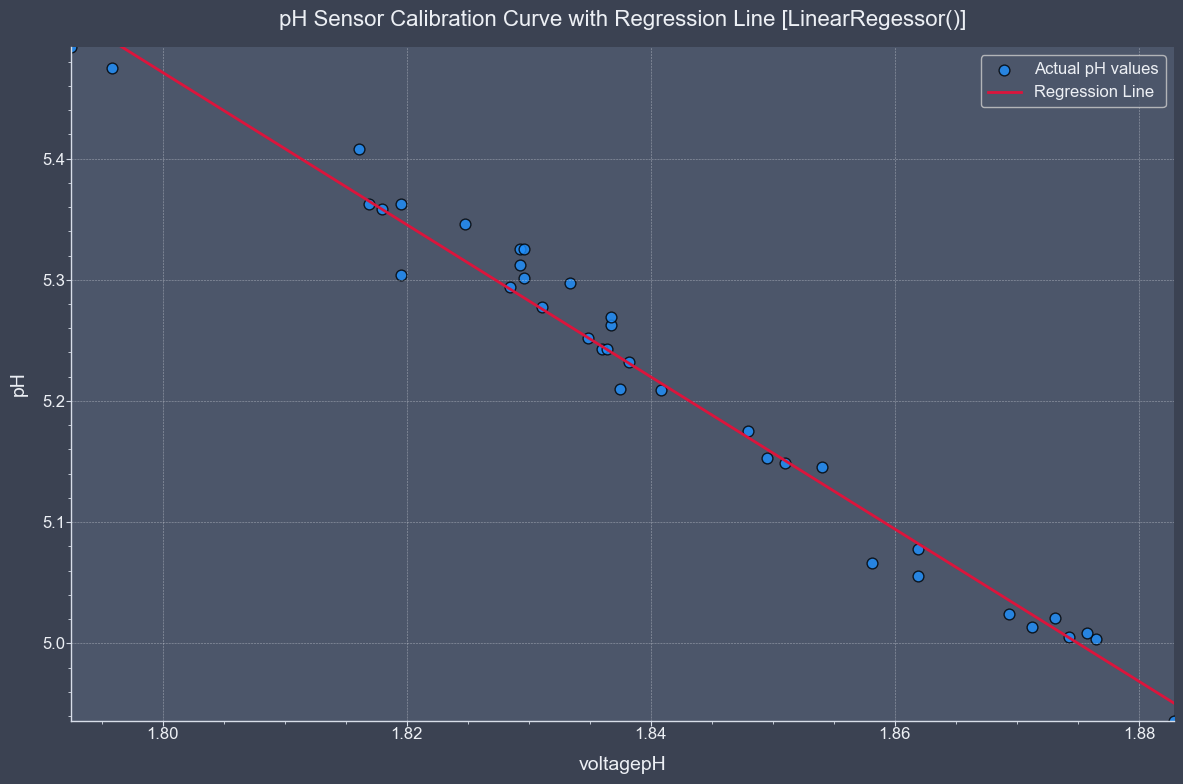

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['voltagePh']].values
y = df['pH'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Print the coefficients and intercept
print("Coefficients: ", linear_model.coef_[0])
print("Intercept: ", linear_model.intercept_)

# Print the performance metrics
print("These metrics apply to the test set:")
print("Mean absolute error: ", np.mean(np.abs(y_test - y_pred)))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of determination R²: ", r2_score(y_test, y_pred))

# Regression Line

from aquarel import load_theme
theme = load_theme("arctic_dark")
theme.apply()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a scatter plot of the actual pH values
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = linear_model.predict(x_range)
plt.scatter(X, y, label='Actual pH values', s=60, alpha=0.8, color='dodgerblue', edgecolor='black')

# Optional: Create a scatter plot of the test pH values
#plt.scatter(X_test, y_test, label='Test pH values', s=10, alpha=0.5)

# Plot the regression line
plt.plot(x_range, y_range, color='crimson', label='Regression Line', linewidth=2.0)

# Set the axis labels and title
plt.xlabel('voltagepH', fontsize=14, labelpad=10)
plt.ylabel('pH', fontsize=14, labelpad=10)

# Set x and y limits
plt.xlim(X.min(), X.max())
plt.ylim(y.min(), y.max())
plt.xticks(fontsize=12)

# Set legend properties
plt.legend(fontsize=12, loc='best', frameon=True)

# Set title and font size
plt.title('pH Sensor Calibration Curve with Regression Line [LinearRegessor()]', fontsize=16, pad=15)

# Set the grid and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

theme.apply_transforms()


In [48]:
print("Test 2 differences in slopes and intercepts")
# Print the coefficients and intercepts of the two models
print("Slope of the Calibration Line: ", compensatedslope*1000)
print("Intercept of the Calibration Line: ", intercept)
print("Coefficient of the Model: ", linear_model.coef_[0])
print("Intercept of the Model: ", linear_model.intercept_)
print("Slope difference (calibration - model): ", compensatedslope*1000 - (linear_model.coef_[0]))
print("Intercept difference (calibration - model): ", intercept - linear_model.intercept_)

Test 2 differences in slopes and intercepts
Slope of the Calibration Line:  -6.243508602849563
Intercept of the Calibration Line:  16.851132743748096
Coefficient of the Model:  -6.278439039168245
Intercept of the Model:  16.772229250074705
Slope difference (calibration - model):  0.03493043631868176
Intercept difference (calibration - model):  0.07890349367339056


## 🧪 Conclusions for Test 2 and pH Measurement

Here are the metrics and parameters for the **calibration performance** against the lab test.

**Sample Size:** (37, 11)

### 📊 Calibration Metrics (vs. Lab Measurements)

| Metric                      | Value                       |
|-----------------------------|-----------------------------|
| Slope                       | -6.2435                     |
| Intercept                   | 16.8511                     |
| Coefficient of Determination (R²) | -0.0043              |
| Root Mean Squared Error (RMSE)   | 0.1419               |
| Standard Deviation of pH         | 0.1416               |

---

Here are the metrics and parameters for the **fitted model line** (what the calibration line _should_ ideally look like).

### 📈 Model Metrics (vs. Lab Measurements)

| Metric                      | Value                       |
|-----------------------------|-----------------------------|
| Coefficient (Slope)         | -6.2784                     |
| Intercept                   | 16.7722                     |
| Coefficient of Determination (R²) | 0.9510              |
| Root Mean Squared Error (RMSE) | 0.0223                  |
| Mean Absolute Error (MAE)   | 0.0183                      |
| Mean Squared Error (MSE)    | 0.0005                      |

---

### 📐 Differences Between Calibration and Model

| Parameter                            | Calibration | Model     | Difference      |
|--------------------------------------|-------------|-----------|-----------------|
| Slope                                | -6.2435     | -6.2784   | 0.0349          |
| Intercept                            | 16.8511     | 16.7722   | 0.0789          |

---

### 🔍 Immediate Observations

- **What went wrong with the calibration?**
  - Voltage measurements during calibration differed from those during the lab test.
  - Alternate intercepts calculated using base/acid voltages yielded worse results.
  - Calibration line shows poor fit to actual lab data.
  - Calibration solutions may be aged or expired.
  - The pH sensor may be nearing end-of-life (manufacturer guarantees 24/7 use for ~182 days, but age may affect it regardless of activity).

---

### 🛠️ Recommended Actions

- Redo the calibration using **fresh solutions**.
- Inspect the **pH sensor probe** for signs of wear or degradation.
- Check the **calibration setup**, especially the **accuracy of voltage measurements**:
  - Run a **1-hour test in neutral solution**, and plot voltage vs. time.
  - Perform **10 independent tests**, 50 readings each, spaced at least **10 minutes apart**. Use the **median of each test**, and plot the results to evaluate deviation.


## TDS EC, Slope, Intercept, and Approximation Calculation

### Calibration Procedure

[1] Prepare TDS probe by rinsing with De-Ionized or Battery Water, minimum (3) rinses, preferably (7).

[2] Calibrate TDS probe using 1413 μs/cm Conductivity Standard (or other appropriate value), minimum (2) times, using the calibration code.
- Note: This probe can only read up to 1000ppm, and 2.3V!

[3] The calibration buffer will fill, wait until the 50 measurement threshold is reached, then use that value.

[4] Repeat [step 1] to cleanse the TDS probe.

[5] Repeat [step 2] using De-Ionized water, max 10μs/cm.

[6] Repeat [step 1] to cleanse the TDS probe.

[7] Write the values into the code, assigning them to appropriate variables. Be sure to use the unmodified voltage registering on pin A0. However, be careful of overfitting.
- This probe is very unstable, and I have been unable to find a manufacturer's table on voltages. I have used the function to approximate the voltages.
- I have used the upper 1413 μs/cm to calculate the voltage multiplier.

# TDS Calibration Factors
Includes:

- TDS calibration factors for the TDS probe
- TDS calculation formulas, including temperature compensation
- TDS probe calibration procedures
- brief description of the calibration procedures
- a formula to compute the calibration slope and intercept values using basic Python, with a function to verify TDS calculations (to have a second verification of the C++ code)

In [34]:
# Define resistor offset (10k resistor between ADS1115 A0 pin and ground)
# EC function is non-linear, and we need to use a multiplier to get the correct value
# using this function: ECValue = (133.42 * voltage * voltage * voltage - 255.86 * voltage * voltage + 857.39 * voltage)
# if y = 1413 μs/cm, x = 1.73398 V
# if y = 10 μs/cm, x = 0.0117039 V
# adjust probe voltage to: voltage * resistancemultiplier, which is multiplier = 1.73398/(rawVoltage for 1413 μs/cm)
# Average probe voltage for 1413 μs/cm before multiplier: 0.499 to 0.550 V
# Average probe voltage for 10 μs/cm before multiplier: 0.014 to 0.012 V
resistancemultiplier = 3.33457692

# Set ppm values for conductivity standard and deionized water, as measured by the sensor

measuredConductivityStandard = 665.76
measuredDeionizedWater = 16.23
kCoefficient = 0.019


print("Let's confirm the values...")
print(f'Resistance multiplier: {resistancemultiplier}')
print(f'Conductivity Standard: {measuredConductivityStandard}')
print(f'Deionized Water: {measuredDeionizedWater}')

# degrees Celsius, for temperature compensation, specify the temperature at which
# the sensor is calibrated, or to calculate the pH at a different temperature
temperature = 25.0 

slope = (706.5 - 2.5) / (measuredConductivityStandard - measuredDeionizedWater)

print(f'Slope: {slope}')

intercept = 0 - slope * measuredDeionizedWater

print(f'Intercept: {intercept}')

# The volts are standard Volts, temperature is in deg C
def ECValue(voltage,temperature):
    # Calculate EC value 
    ECValue = (133.42 * voltage * voltage * voltage - 255.86 * voltage * voltage + 857.39 * voltage)
    tempCorrection = 1.0 + kCoefficient * (temperature - 25.0)
    compensatedEC = ECValue / tempCorrection
    print("EC with voltage: ", voltage, " is: ", compensatedEC)
    return compensatedEC

def TdsValue(ECValue):
    # Calculate initial TDS value, computed from the compensated EC value
    rawTds = ECValue * 0.5
    # Apply the linear regression to correct the TDS value 
    correctedTds = slope * rawTds + intercept
    print("TDS with EC: ", ECValue, " is: ", correctedTds)
    return correctedTds

Let's confirm the values...
Resistance multiplier: 3.33457692
Conductivity Standard: 665.76
Deionized Water: 16.23
Slope: 1.0838606376918696
Intercept: -17.591058149739045


In [35]:
TdsValue(ECValue(0.0493,25))

EC with voltage:  0.0493  is:  41.66344863420694
TDS with EC:  41.66344863420694  is:  4.987627852817948


4.987627852817948

<Figure size 640x480 with 0 Axes>

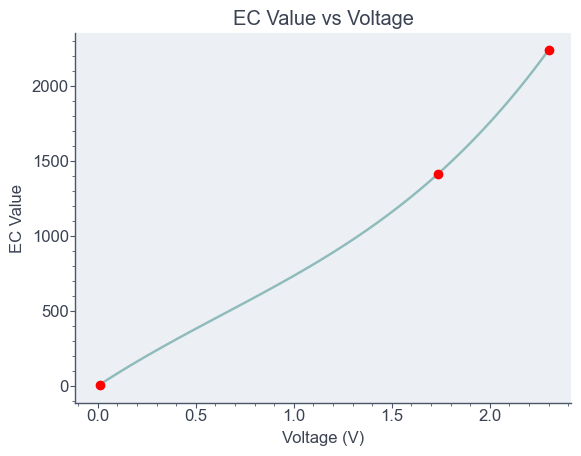

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 133.42 * x * x * x - 255.86 * x * x + 857.39 * x

plt.figure()
x = np.linspace(0, 2.3, 100)
y = f(x)
plt.plot(x, y)
plt.plot(1.73398, 1413, 'ro')
plt.plot(0.0117039, 5, 'ro')
plt.plot(2.30, 2241.38, 'ro')
# plt.plot(1.66728846, 1413, 'cx') # testing values
# plt.plot(1.83401731, 1413, 'cx') # testing values
plt.xlabel('Voltage (V)')
plt.ylabel('EC Value')
plt.title('EC Value vs Voltage')
plt.grid()
plt.show()

## TDS Data Assessment

*The cells below use RMSE and R² to evaluate the fitting for the adjustment line (calibration.)*

TDS R^2: 0.9999999999872179
TDS RMSE: 2.976254959095673e-06
TDS Standard Deviation:  0.8324709446317724


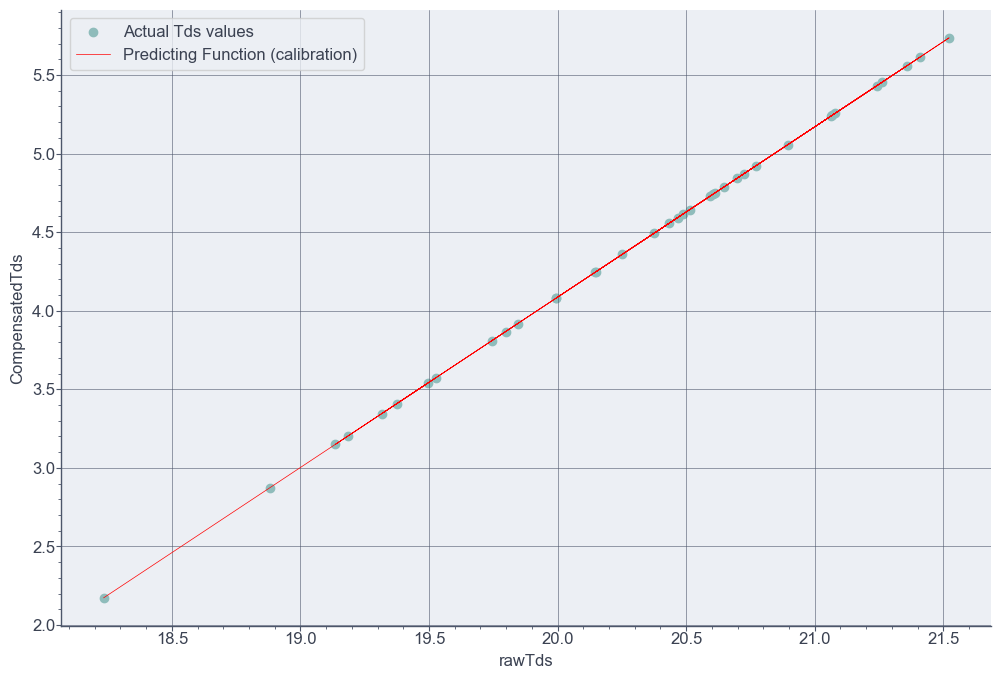

In [37]:
# Let's confirm the values...
# Resistance multiplier: 3.33457692
# Conductivity Standard: 665.76
# Deionized Water: 16.23
# Slope: 1.0838606376918696
# Intercept: -17.591058149739045

# Computed Tds values from the sensor
y_computed = df['TDS'].to_numpy()  # measured and fitted values

# Raw (unfitted), voltage multiplied temperature adjusted Tds values from the sensor
raw_Tds = df['rawTDS'].to_numpy()  # measured and unfitted values

# Predicted TDS values using the equation
y_predicted = 1.0838606376918696 * raw_Tds - 17.591058149739045

# Compute mean of actual values
y_mean = np.mean(y_computed)

# Compute R^2
ss_total = np.sum((y_computed - y_mean) ** 2)
ss_residual = np.sum((y_computed - y_predicted) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Compute RMSE
mse = ((y_computed - y_predicted) ** 2).mean()
rmse = np.sqrt(mse)

print("TDS R^2:", r_squared)
print("TDS RMSE:", rmse)
print("TDS Standard Deviation: ", np.std(y_computed))

# Let's plot the Tds dataset
plt.figure(figsize=(12, 8))
plt.scatter(raw_Tds, y_computed, label='Actual Tds values')
#plt.scatter(raw_Tds, y_predicted, label='Predicted Tds values')
plt.plot(raw_Tds, y_predicted, color='red', label='Predicting Function (calibration)', linewidth=0.5)
plt.xlabel('rawTds')
plt.ylabel('CompensatedTds')
plt.legend()
plt.show()

## Calibration Code

- Uses a buffer that holds 50 measurements.
- Voltage multiplier factors are determined at calibration time (raw voltage print, then a multiplier to get it to an expected voltage value). Gives a better fit when generating the fitting line.
- pH and Tds must be calibrated separately.

```
#include <OneWire.h>
#include <DallasTemperature.h>
#include<ADS1115_WE.h> 
#include<Wire.h>
#define I2C_ADDRESS_PH  0x4B
#define I2C_ADDRESS_TDS  0x4A

// GPIO where the DS18B20 is connected to
const int oneWireBus = 5;  

// Setup a oneWire instance to communicate with any OneWire devices
OneWire oneWire(oneWireBus);

// Pass our oneWire reference to Dallas Temperature sensor 
DallasTemperature sensors(&oneWire);

ADS1115_WE adc_ph = ADS1115_WE(I2C_ADDRESS_PH);
ADS1115_WE adc_tds = ADS1115_WE(I2C_ADDRESS_TDS);

float acidVoltage    = 1043.00;    //buffer solution 4.01 at 25C
float neutralVoltage = 788.91;     //buffer solution 7.0 at 25C
float baseVoltage    = 561.75;     //buffer solution 10.0 at 25C
float referenceTemp = 25.0; // reference temperature of 25 deg C
float measuredConductivityStandard = 665.76; // Measured conductivity standard for calibration
float measuredDeionizedWater = 16.23;         // Measured deionized water for calibration
int iterations = 50;
float *analogBuffer;   // Dynamic array for buffer, NOTE: there is no destructor for the buffer
int analogBufferIndex; // Index for circular buffer

void setup() {
  Wire.begin();
  Serial.begin(9600);
  
  pinMode(23, OUTPUT);
  digitalWrite(23, HIGH);
  pinMode(19, OUTPUT);
  digitalWrite(19, HIGH);

  if(!adc_ph.init()){
    Serial.print("ADS1115 No 1 not connected!");
  }
  adc_ph.setVoltageRange_mV(ADS1115_RANGE_6144);
  adc_ph.setMeasureMode(ADS1115_CONTINUOUS); 
  adc_ph.setCompareChannels(ADS1115_COMP_0_GND);
  
  if(!adc_tds.init()){
    Serial.print("ADS1115 No 2 not connected!");
  }
  adc_tds.setVoltageRange_mV(ADS1115_RANGE_6144);
  adc_tds.setMeasureMode(ADS1115_CONTINUOUS); 
  adc_tds.setCompareChannels(ADS1115_COMP_0_GND);

  pinMode(18, OUTPUT);
  digitalWrite(18, HIGH);
  sensors.begin();

  // Allocate memory for analog buffer
  analogBuffer = new float[iterations];
  for (int i = 0; i < iterations; i++)
    {
      analogBuffer[i] = 0.0;
    }
}

void loop() {
  float voltage = 0.0;
  float probeVoltage = 0.0;
  
  sensors.requestTemperatures(); 
  float temperatureC = sensors.getTempCByIndex(0);
  float temperatureF = sensors.getTempFByIndex(0);
  Serial.print(temperatureC);
  Serial.println("ºC");
  Serial.print(temperatureF);
  Serial.println("ºF");
  
  
  // Serial.println("****************BEGIN PH**********************");
  // // BEGIN PH
  // voltage = adc_ph.getResult_mV(); // 10kOhm resistor present
  // probeVoltage = voltage*2;  // multiply by 10kOhm factor
  // Serial.println("Voltage [mV], ADS1115 PH: ");
  // Serial.println(voltage);
  // Serial.println("Adjusted Voltage [mV], ADS1115 PH: ");
  // Serial.println(probeVoltage, 12);

  // analogBuffer[analogBufferIndex] = probeVoltage;
  // analogBufferIndex = (analogBufferIndex + 1) % iterations;
  // float sortedBuffer[iterations];
  // std::copy(analogBuffer, analogBuffer + iterations, sortedBuffer);
  // std::sort(sortedBuffer, sortedBuffer + iterations);
  // float medianValue;
  // if (iterations % 2 == 0)
  // {
  //   medianValue = (sortedBuffer[iterations / 2 - 1] + sortedBuffer[iterations / 2]) / 2.0f;
  // }
  // else
  // {
  //   medianValue = sortedBuffer[iterations / 2];
  // }
  // for (int i = 0; i < iterations; i++)
  //   {
  //     Serial.print(sortedBuffer[i]);
  //     Serial.print( " ");
  //   }
  // Serial.println("");
  // Serial.print("Median Value: ");
  // Serial.println(medianValue, 12);
  // Serial.print("Median Value * 1/2: ");
  // Serial.println(medianValue/2, 12);

  // probeVoltage = medianValue;
  // // Build pH calibration code
  // double slopePH = ((7.0 - 4.01) / (neutralVoltage * 2 - acidVoltage * 2) + (7 - 10.0) / (neutralVoltage * 2 - baseVoltage * 2)) / 2;
  // double interceptPH = 7.0 - slopePH * (neutralVoltage * 2);
  // double compensatedSlope = slopePH * ((temperatureC + 273.15) / (25.0 + 273.15));
  // double pHValue = compensatedSlope * probeVoltage + interceptPH; //y = k*x + b
  // // double pHValue = slopePH * probeVoltage + interceptPH; //y = k*x + b
  // Serial.print("slope:");
  // Serial.print(slopePH,12);
  // Serial.print(",intercept:");
  // Serial.println(interceptPH,12);
  // Serial.print("pHValue: ");
  // Serial.println(pHValue);
	
	Serial.println("****************BEGIN TDS**********************");
  // BEGIN TDS
  // Build Tds Calibration code
  voltage = adc_tds.getResult_V(); // 10kOhm resistor present
  probeVoltage = voltage * 3.33457692; // multiply by 10kOhm factor, 1413 uS/cm factor
  Serial.print("Voltage [V], ADS1115 No 2: ");
  Serial.println(voltage, 12);
  Serial.print("Adjusted Voltage [V] using 1413 uS/cm factor, ADS1115 No 2: ");
  Serial.println(probeVoltage,12);
  
  analogBuffer[analogBufferIndex] = probeVoltage;
  analogBufferIndex = (analogBufferIndex + 1) % iterations;
  float sortedBuffer[iterations];
  std::copy(analogBuffer, analogBuffer + iterations, sortedBuffer);
  std::sort(sortedBuffer, sortedBuffer + iterations);
  float medianValue;
  if (iterations % 2 == 0)
  {
    medianValue = (sortedBuffer[iterations / 2 - 1] + sortedBuffer[iterations / 2]) / 2.0f;
  }
  else
  {
    medianValue = sortedBuffer[iterations / 2];
  }
  for (int i = 0; i < iterations; i++)
    {
      Serial.print(sortedBuffer[i]);
      Serial.print( " ");
    }
  Serial.println("");
  Serial.print("Median Value: ");
  Serial.println(medianValue, 12);
  Serial.print("Median Value * 1/3.33457692: ");
  Serial.println(medianValue/3.33457692, 12);
  probeVoltage = medianValue;

  float kCoefficient = 0.019;
  float rawEC = (133.42 * probeVoltage * probeVoltage * probeVoltage - 255.86 * probeVoltage * probeVoltage + 857.39 * probeVoltage);
  Serial.print("TDS before Temp Correction and fitting function: ");
  Serial.println(rawEC * 0.5);
  float tempCorrection = 1.0 + kCoefficient * (temperatureC - referenceTemp);
  float compensatedEC = rawEC / tempCorrection;
  float rawTds = compensatedEC * 0.5;
  Serial.print("TDS after Temp Correction and before fitting function: ");
  Serial.println(rawTds);
  float slopeTDS = (706.5 - 2.5) / (measuredConductivityStandard - measuredDeionizedWater);
  float interceptTDS = 0 - slopeTDS * measuredDeionizedWater;
  float correctedTds = slopeTDS * rawTds + interceptTDS; //y = k*x + b
  Serial.print("slope: ");
  Serial.println(slopeTDS);
  Serial.print("intercept:");
  Serial.println(interceptTDS);
  Serial.print("After Temp Correction and fitting function: correctedTds = ");
  Serial.println(correctedTds);
 
  Serial.println("****************************");  
  
   delay(100);
 }
```

---
### Additional Calculations

---

### Second Test used these fitting functions:

- Test started 01.04.2025.

- PH:

```
Let's confirm the values...
Resistance multiplier: 2
Neutral voltage: 1577.82
Acid voltage: 2086.0
Base voltage: 1123.5
Slope: -0.006243508602849564
Intercept: 16.851132743748096
Compensated slope: -0.006243508602849564
```

_Results in_:
$ y = -0.006243508602849564 * x + 16.851132743748096 $

- TDS:

```
Let's confirm the values...
Resistance multiplier: 3.33457692
Conductivity Standard: 665.76
Deionized Water: 16.23
Slope: 1.0838606376918696
Intercept: -17.591058149739045
```

_Results in_:
$ y = 1.0838606376918696 * x - 17.591058149739045 $

- The factor __rawTds__ in the data saved to the SD Card and to Thinger.io is before applying this function. The data __finalTds__ includes the calculation with this function.